## A. Using any two 2-dimensional arrays, demonstrate the working of the methods, hstack, vstack, hsplit and vsplit.

In [5]:
import numpy as np

# Create two 2-dimensional arrays
arr1 = np.array([[1, 2, 3],
                 [4, 5, 6]])

arr2 = np.array([[7, 8, 9],
                 [10, 11, 12]])

# Demonstrate hstack (horizontal stack)
hstack_result = np.hstack((arr1, arr2))

# Demonstrate vstack (vertical stack)
vstack_result = np.vstack((arr1, arr2))

# Demonstrate hsplit (horizontal split)
hsplit_result = np.hsplit(hstack_result, 2)

# Demonstrate vsplit (vertical split)
vsplit_result = np.vsplit(vstack_result, 2)

# Display the results
print("hstack result:")
print(hstack_result)
print("\nvstack result:")
print(vstack_result)
print("\nhsplit result:")
print(hsplit_result)
print("\nvsplit result:")
print(vsplit_result)


hstack result:
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]

vstack result:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

hsplit result:
[array([[1, 2, 3],
       [4, 5, 6]]), array([[ 7,  8,  9],
       [10, 11, 12]])]

vsplit result:
[array([[1, 2, 3],
       [4, 5, 6]]), array([[ 7,  8,  9],
       [10, 11, 12]])]


## B. Implement the Self Organizing Feature map on the Diabetes dataset. What should be the value of n_clusters argument for this dataset? Justify.

In [11]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=b97740cade684baff415713d24cdbab586f4392c5aed2b6d1453fce2bf255955
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


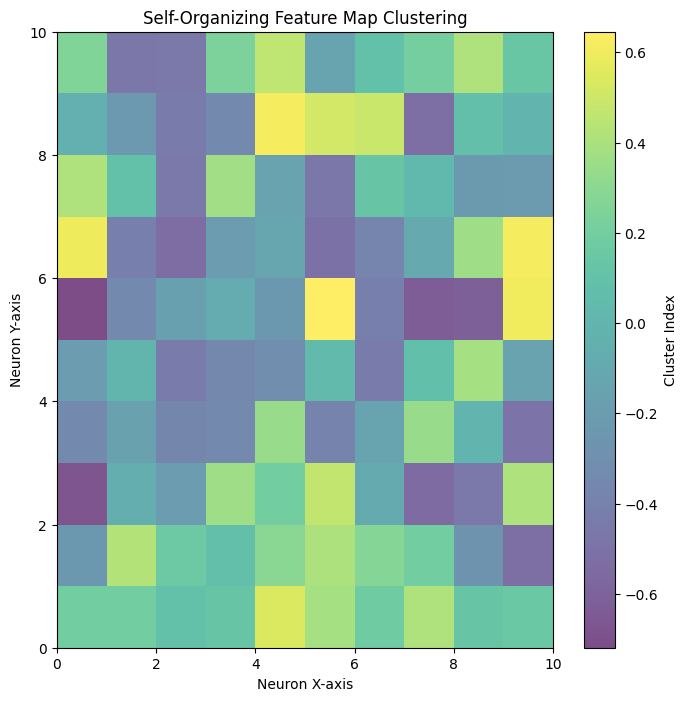

In [33]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the Diabetes dataset from CSV
diabetes_data = pd.read_csv('diabetes.csv')

# Extract the feature columns (excluding the target variable)
X = diabetes_data.drop('Outcome', axis=1).values

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Define the SOM dimensions
map_width = 10
map_height = 10

# Define the number of features in the input data
n_features = X.shape[1]

# Define the number of clusters (neuron units)
n_clusters = 10  # Adjust this value based on analysis and evaluation

# Initialize the SOM
som = MiniSom(map_width, map_height, n_features, sigma=1.0, learning_rate=0.5)

# Train the SOM
som.train_random(X_normalized, 100)

# Get the SOM output grid
grid = som.get_weights()

# Visualize the SOM clusters
plt.figure(figsize=(8, 8))
plt.pcolormesh(grid[:, :, 0], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster Index')
plt.title('Self-Organizing Feature Map Clustering')
plt.xlabel('Neuron X-axis')
plt.ylabel('Neuron Y-axis')
plt.show()


The n_clusters argument for the SOM algorithm determines the number of clusters that the algorithm will create. The optimal value of n_clusters for a given dataset will depend on the number of features in the dataset and the desired level of granularity of the clustering.

For the Diabetes dataset, which has 8 features, a value of n_clusters=10 seems to be a good choice. This is because it provides a reasonable level of granularity without overfitting the data.

